In [3]:
import tensorflow as tf
import sklearn
from keras.src.preprocessing import image

print(tf.__version__)

2.14.0


In [4]:
import importlib

try : 
    import charset_normalizer
except ModuleNotFoundError:
    charset_normalizer = importlib.import_module("charset_normalizer")

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [7]:
tf.config.list_physical_devices('GPU')

[]

#Data Augumentation

In [8]:
batch_size = 16

training_data_generator = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, shear_range = 0.2, zoom_range=0.2,width_shift_range=0.2,
                                             height_shift_range=0.2,validation_split=0.1)

In [9]:
train = training_data_generator.flow_from_directory('training', target_size=(256, 256), color_mode='rgb',
                                                    class_mode='binary', batch_size=10, subset='training')

validation = training_data_generator.flow_from_directory('training', target_size=(256,256), color_mode= 'rgb', class_mode='binary', batch_size=10, subset='validation')

Found 12360 images belonging to 2 classes.
Found 1373 images belonging to 2 classes.


CNN architecture

In [10]:
cnn = tf.keras.models.Sequential()

#1st layer
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=3, padding='same', activation='relu',input_shape=[256,256,3] ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#second layer
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, padding='same', activation='relu' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#3rd layer
cnn.add(tf.keras.layers.Conv2D(filters = 128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#flattening
cnn.add(tf.keras.layers.Flatten())

#Fully Connected layer
cnn.add(tf.keras.layers.Dense(units = 128, activation= 'relu'))

#Output layers
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 128)       0

time to train CNN model

In [14]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('D:\Projects\Fire and smoke\models\Fire_and_smoke_model.h5',
                                              monitor='val_loss',mode="min",
                                              save_best_only=True)
callbacks=checkpoint
# E:\Projects\Fire and smoke\models

In [15]:
cnn.compile(optimizer='Adam', loss='binary_crossentropy', metrics =['accuracy'])
cnn.fit_generator(train,validation_data=validation,epochs=1,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks )

C:\Users\pr141\AppData\Local\Temp\ipykernel_27460\2054807139.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(train,validation_data=validation,epochs=1,


772/772 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9896

C:\Users\pr141\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


772/772 [==============================] - 481s 622ms/step - loss: 0.0437 - accuracy: 0.9896 - val_loss: 0.0309 - val_accuracy: 0.9882


Testing

In [17]:
from tensorflow.keras.models import load_model
cnn = load_model('D:\Projects\Fire and smoke\models\Fire_and_smoke_model.h5')

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 128)       0

In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [20]:
image_for_testing=r'D:\Projects\Fire and Smoke\Training\Smoke\14.png'
# image_for_testing=r'C:\Users\pr141\Downloads\download.jpeg'


1/1 [==============================] - 0s 96ms/step


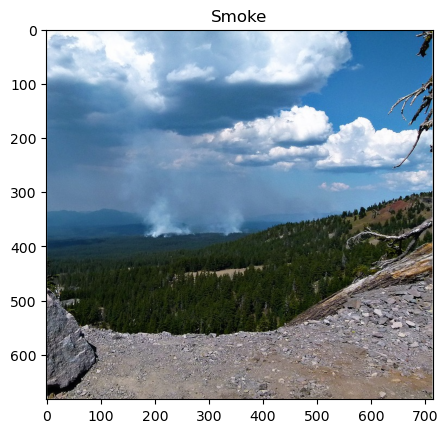

In [21]:
test_image=image.load_img(image_for_testing,target_size=(256,256))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
# result=cnn.predict_classes(test_image)
result = (cnn.predict(test_image) > 0.5).astype("int32")

Catagories=['Fire','Smoke']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(result[0][0])])
plt.show()